In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os, sys
import pandas as pd
from scipy.interpolate import interp1d

sys.path.append('../')
import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# NR22_t0 = datetime.datetime(2023, 9,26, 1,40, 0)
NR22_t0 = datetime.datetime(2023, 9,30, 5,10, 0)
# NR23_t0 = datetime.datetime(2024, 2,28, 9,41, 0)
NR23_t0 = datetime.datetime(2024, 3, 2,11, 0, 0)

days_span = 6

In [3]:
def dt_to_plc_str(dt):
    return dt.strftime("%y%m%d")
                       
def dt_to_mmr_str(dt):
    return dt.strftime("%Y-%m-%d")

print(dt_to_plc_str(NR23_t0))
print(dt_to_mmr_str(NR23_t0))

240302
2024-03-02


In [4]:
series_plc_NR22 = nf.create_date_range(dt_to_plc_str(NR22_t0), days_span, fmt="%y%m%d")
offset_plc_NR22 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR22   = nf.read_plclog_data(series_plc_NR22, offset_plc_NR22)
# data_plc_NR22.keys()

series_mmr_NR22 = nf.create_date_range(dt_to_mmr_str(NR22_t0), days_span)
offset_mmr_NR22 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR22   = nf.read_MACRT_data(series_mmr_NR22, offset_mmr_NR22)
# data_mmr_NR22.keys()

The starting date is: 
2023-09-30 00:00:00
The starting date is: 
2023-09-30 00:00:00


In [5]:
series_plc_NR23 = nf.create_date_range(dt_to_plc_str(NR23_t0), days_span, fmt="%y%m%d")
offset_plc_NR23 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR23   = nf.read_plclog_data(series_plc_NR23, offset_plc_NR23)
# data_plc_NR23.keys()

series_mmr_NR23 = nf.create_date_range(dt_to_mmr_str(NR23_t0), days_span)
offset_mmr_NR23 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR23   = nf.read_MACRT_data(series_mmr_NR23, offset_mmr_NR23)
# data_mmr_NR23.keys()

The starting date is: 
2024-03-02 00:00:00
The starting date is: 
2024-03-02 00:00:00


In [6]:
def pd_td_to_hrs(tdelta):
    return tdelta.total_seconds()/3600.

def pd_td_to_days(tdelta):
    return tdelta.total_seconds()/(24.*3600.)

In [7]:
NR22_time_mmr = (data_mmr_NR22['ctime']-NR22_t0).apply(pd_td_to_days)
NR23_time_mmr = (data_mmr_NR23['ctime']-NR23_t0).apply(pd_td_to_days)

NR22_time_plc = (data_plc_NR22['ctime']-NR22_t0).apply(pd_td_to_days)
NR23_time_plc = (data_plc_NR23['ctime']-NR23_t0).apply(pd_td_to_days)

## Make the temperature plot

<IPython.core.display.Javascript object>


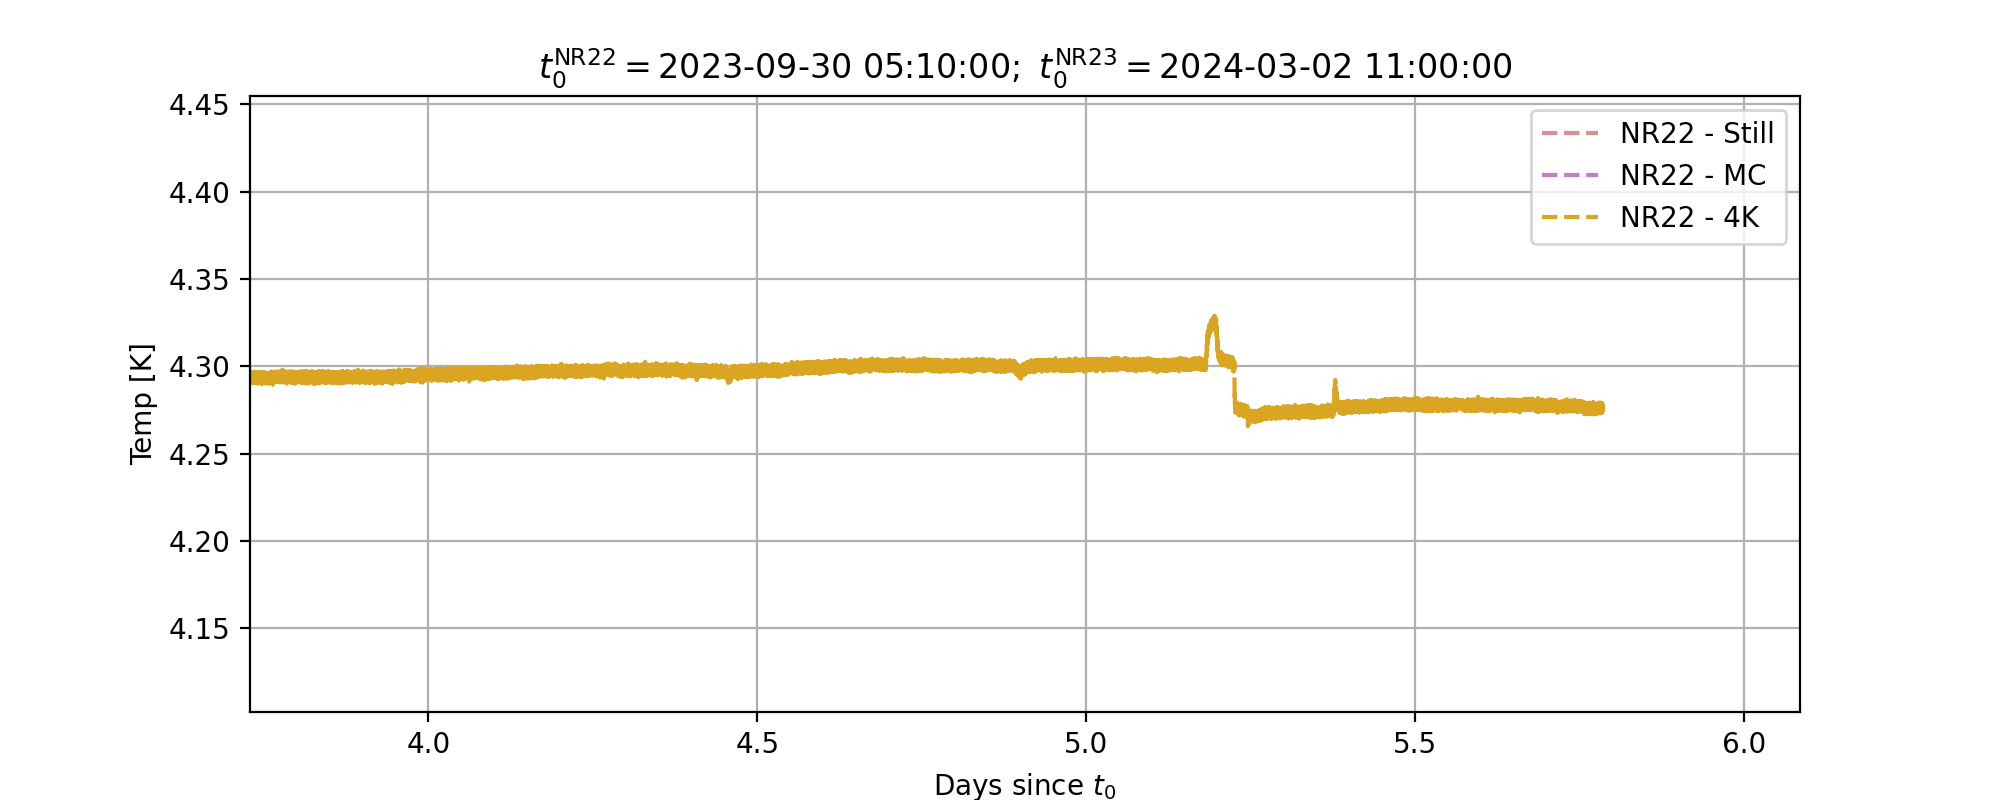

In [11]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')
# a.set_title(r"$t_0^\mathrm{NR17}=$"+str(NR17_t0)+r"$;~t_0^\mathrm{NR23}=$"+str(NR23_t0))
a.set_title(r"$t_0^\mathrm{NR22}=$"+str(NR22_t0)+r"$;~t_0^\mathrm{NR23}=$"+str(NR23_t0))

ls_NR22 = "--"
ls_NR23 = "-"

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

## Plot the PLC temperature data for Run 22
# a.plot(NR22_time_plc, data_plc_NR22['RuO2 CP']    , label='NR22 - CP'   , color=c_CP, ls=ls_NR22)
a.plot(NR22_time_plc, data_plc_NR22['Still Stage'], label='NR22 - Still', color=c_St, ls=ls_NR22, alpha=0.5)
a.plot(NR22_time_plc, data_plc_NR22['FR MC']      , label='NR22 - MC'   , color=c_MC, ls=ls_NR22, alpha=0.5)
# a.plot(NR22_time_plc, data_plc_NR22['1srt Stage'] , label='NR22 - 60K'  , color=c_1S, ls=ls_NR22)
a.plot(NR22_time_plc, data_plc_NR22['2nd Stage']  , label='NR22 - 4K'   , color=c_2S, ls=ls_NR22)

## Plot the PLC temperature data for Run 23
# a.plot(NR23_time_plc, data_plc_NR23['RuO2 CP']    , label='NR23 - CP'   , color=c_CP, ls=ls_NR23)
# a.plot(NR23_time_plc, data_plc_NR23['Still Stage'], label='NR23 - Still', color=c_St, ls=ls_NR23)
# a.plot(NR23_time_plc, data_plc_NR23['FR MC']      , label='NR23 - MC'   , color=c_MC, ls=ls_NR23)
# a.plot(NR23_time_plc, data_plc_NR23['1srt Stage'] , label='NR23 - 60K'  , color=c_1S, ls=ls_NR23)
# a.plot(NR23_time_plc, data_plc_NR23['2nd Stage']  , label='NR23 - 4K'   , color=c_2S, ls=ls_NR23)

# a.set_yscale('log')

# a.set_ylim([0.000 , 0.920])

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


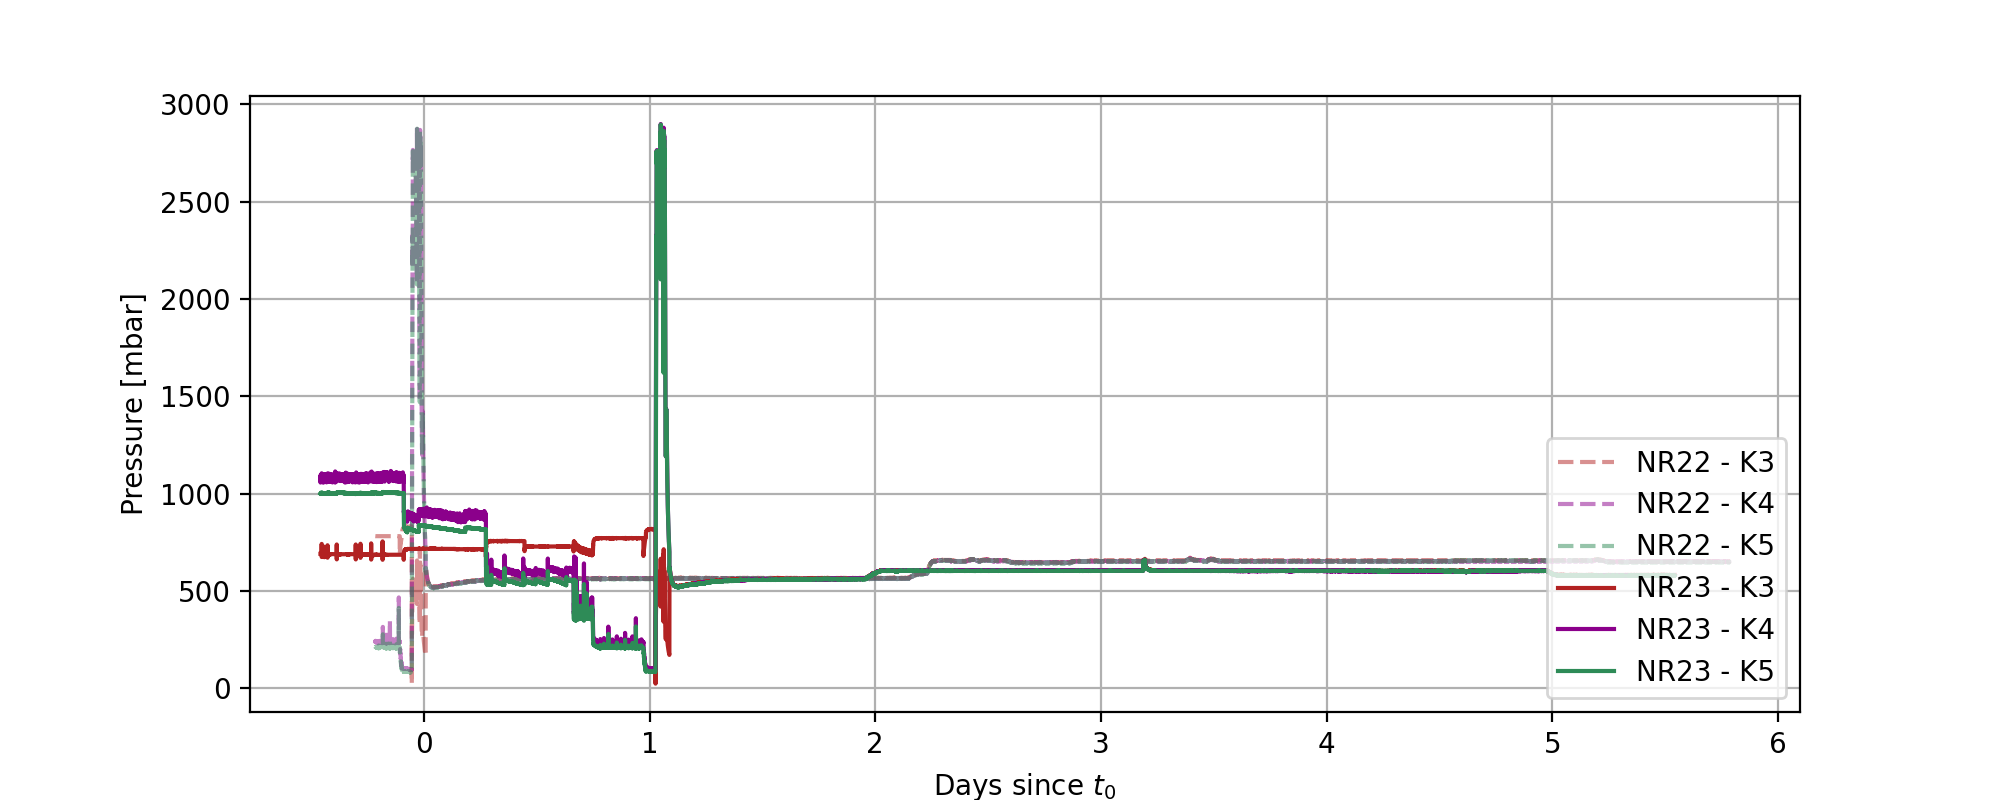

In [9]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Pressure [mbar]')

c_P1 = 'dodgerblue'
c_K3 = 'firebrick'
c_K4 = 'darkmagenta'
c_K5 = 'seagreen'
c_K6 = 'goldenrod'
c_P2 = 'darkgrey'
c_P3 = 'olivedrab'

# ## Plot the PLC data for Run 22
# a.plot(NR22_time_plc, data_plc_NR22['P1 mbar'], label='NR22 - P1', color=c_P1, ls=ls_NR22, alpha=0.5)
a.plot(NR22_time_plc, data_plc_NR22['K3 mbar'], label='NR22 - K3', color=c_K3, ls=ls_NR22, alpha=0.5)
a.plot(NR22_time_plc, data_plc_NR22['K4 mbar'], label='NR22 - K4', color=c_K4, ls=ls_NR22, alpha=0.5)
a.plot(NR22_time_plc, data_plc_NR22['K5 mbar'], label='NR22 - K5', color=c_K5, ls=ls_NR22, alpha=0.5)
# a.plot(NR22_time_plc, data_plc_NR22['K6 mbar'], label='NR22 - K6', color=c_K6, ls=ls_NR22, alpha=0.5)
# a.plot(NR22_time_plc, data_plc_NR22['P2 mbar'], label='NR22 - P2', color=c_P2, ls=ls_NR22, alpha=0.5)
# a.plot(NR22_time_plc, data_plc_NR22['P3 mbar'], label='NR22 - P3', color=c_P3, ls=ls_NR22, alpha=0.5)

# ## Plot the PLC data for Run 23
# a.plot(NR23_time_plc, data_plc_NR23['P1 mbar'], label='NR23 - P1', color=c_P1, ls=ls_NR23)
a.plot(NR23_time_plc, data_plc_NR23['K3 mbar'], label='NR23 - K3', color=c_K3, ls=ls_NR23)
a.plot(NR23_time_plc, data_plc_NR23['K4 mbar'], label='NR23 - K4', color=c_K4, ls=ls_NR23)
a.plot(NR23_time_plc, data_plc_NR23['K5 mbar'], label='NR23 - K5', color=c_K5, ls=ls_NR23)
# a.plot(NR23_time_plc, data_plc_NR23['K6 mbar'], label='NR23 - K6', color=c_K6, ls=ls_NR23)
# a.plot(NR23_time_plc, data_plc_NR23['P2 mbar'], label='NR23 - P2', color=c_P2, ls=ls_NR23)
# a.plot(NR23_time_plc, data_plc_NR23['P3 mbar'], label='NR23 - P3', color=c_P3, ls=ls_NR23)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


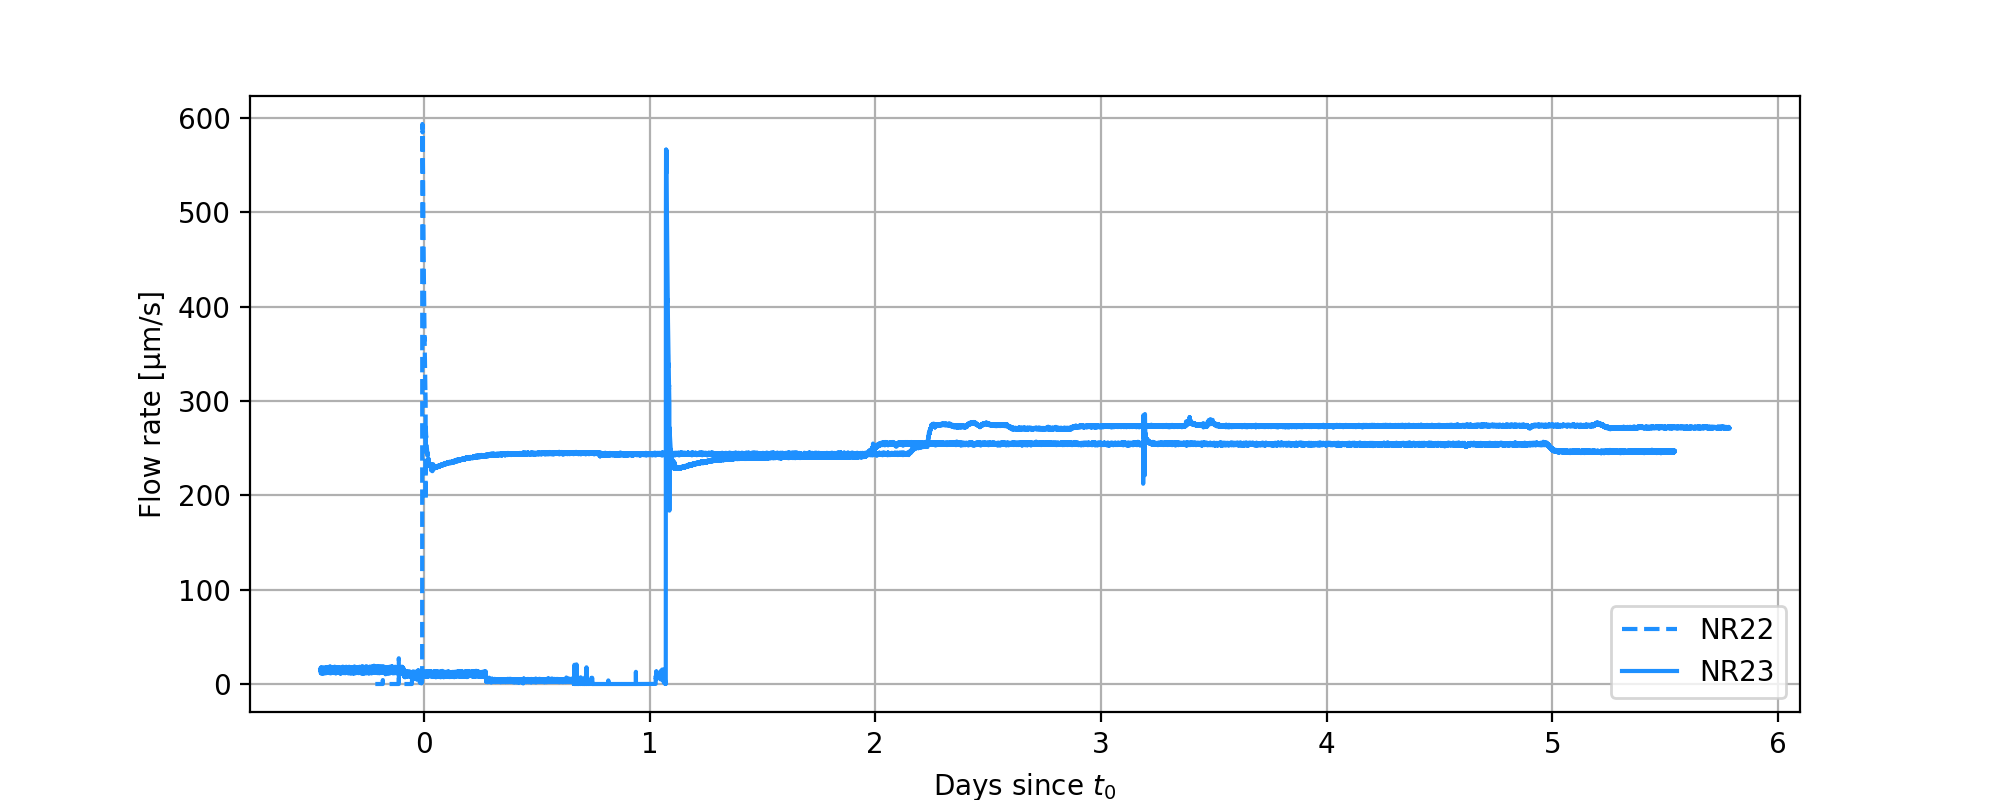

In [10]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Flow rate [µm/s]')

c_FR = 'dodgerblue'

# ## Plot the PLC data for Run 15
a.plot(NR22_time_plc, data_plc_NR22[data_plc_NR22.keys()[8]], label='NR22', color=c_FR, ls=ls_NR22)

# ## Plot the PLC data for Run 18
a.plot(NR23_time_plc, data_plc_NR23[data_plc_NR23.keys()[8]], label='NR23', color=c_FR, ls=ls_NR23)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)